In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

print("Bibliotecas instaladas com sucesso!")


Bibliotecas instaladas com sucesso!


In [2]:
#Criando as funções estatísticas
def media(x):
    return np.mean(x)

def mediana(x):
    return np.median(x)

def moda(x):
    return stats.mode(x, keepdims=False)[0] # Use stats.mode

def desvio_padrao(x):
    return np.std(x)

def variancia(x):
    return np.var(x)

In [17]:
# Carregar as tabelas CSV, especificando o delimitador e codificação, se necessário
tabela1 = pd.read_csv('base_pecas_IA.csv', delimiter=';', encoding='utf-8') # use o delimitador correto, como ';'
tabela2 = pd.read_csv('base_pecas_IA_2000.csv', delimiter=';', encoding='utf-8') # use o delimitador correto, como ';'

# Converter a coluna 'Valor' para float, verificando se existe e tratando possíveis erros
for i, tabela in enumerate([tabela1, tabela2]): # Use enumerate to get an index
    if 'Valor' in tabela.columns: # Verifica se a coluna 'Valor' existe
        try:
            tabela['Valor'] = tabela['Valor'].str.replace(',', '.').astype(float) # Substitui vírgula por ponto, se necessário
        except ValueError:
            print(f"Erro ao converter 'Valor' para float na tabela: {i + 1}") # Print table number instead of name
            # Tratar o erro, por exemplo, substituindo valores inválidos por NaN
            tabela['Valor'] = pd.to_numeric(tabela['Valor'], errors='coerce')
    else:
        print(f"Coluna 'Valor' não encontrada na tabela: {i + 1}") # Print table number instead of name

# Verificar as colunas das tabelas
print("Colunas da tabela 1:", tabela1.columns)
print("Colunas da tabela 2:", tabela2.columns)

# Realizar a união das tabelas
tabela_uniao = pd.concat([tabela1, tabela2], ignore_index=True)

# Exibir as primeiras linhas da tabela resultante
print(tabela_uniao.head())

# Salvar a tabela resultante em um novo CSV
tabela_uniao.to_csv('tabela_uniao.csv', index=False)

Colunas da tabela 1: Index(['Peca', 'Regiao', 'Valor'], dtype='object')
Colunas da tabela 2: Index(['Peca', 'Regiao', 'Valor'], dtype='object')
     Peca          Regiao    Valor
0  Cambio           Bahia  2980.27
1  Cambio  Santa Catarina  4599.60
2  Cambio          Parana  4091.95
3  Cambio          Parana  3756.08
4  Cambio           Goias  3919.72


In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Carregar o conjunto de dados
data = pd.read_csv('tabela_uniao.csv')

# Visualizar as primeiras linhas do dataframe
print(data.head())

     Peca          Regiao    Valor
0  Cambio           Bahia  2980.27
1  Cambio  Santa Catarina  4599.60
2  Cambio          Parana  4091.95
3  Cambio          Parana  3756.08
4  Cambio           Goias  3919.72


In [21]:
# Definir recursos e variável alvo
# Supondo que a coluna 'target' seja a variável que você deseja prever
X = data.drop(['Peca', 'Regiao'], axis=1)  # recursos
y = data['Valor']                # variável alvo


In [29]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo
model.fit(X_train, y_train)

print (X_train)
print (y_train)

       Valor
79    236.32
197     6.06
38     88.89
24   2317.36
122   479.43
..       ...
106   336.23
14   4070.01
92     21.55
179    22.76
102   393.04

[160 rows x 1 columns]
79      236.32
197       6.06
38       88.89
24     2317.36
122     479.43
        ...   
106     336.23
14     4070.01
92       21.55
179      22.76
102     393.04
Name: Valor, Length: 160, dtype: float64


In [25]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)
print (y_pred)

[7.72000e+01 4.83427e+03 1.51230e+02 3.22000e+00 1.32800e+01 4.65620e+02
 2.26030e+02 1.95900e+01 2.18400e+01 4.55400e+01 2.59130e+02 2.76800e+01
 1.60400e+01 1.46150e+02 2.48000e+00 2.62100e+01 5.49200e+01 8.46000e+00
 2.87360e+02 1.84690e+02 2.23200e+02 4.73115e+03 5.20000e+00 4.55600e+01
 1.66580e+02 7.65800e+01 1.04470e+02 2.90000e+02 1.26800e+01 1.29700e+01
 2.88873e+03 3.40427e+03 3.68500e+01 2.24350e+02 2.96000e+00 3.77540e+02
 1.38200e+01 1.07300e+01 2.37500e+01 2.57900e+02]


In [30]:
# Avaliar o modelo usando métricas como MSE e R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 2.9027214788818886e-25
R² Score: 1.0


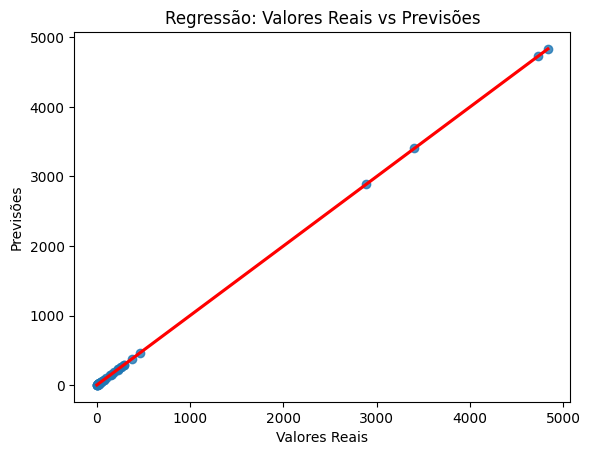

In [31]:
import seaborn as sns

# Criar gráfico com seaborn
sns.regplot(x=y_test, y=y_pred, ci=None, line_kws={"color": "red"})
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Regressão: Valores Reais vs Previsões')
plt.show()


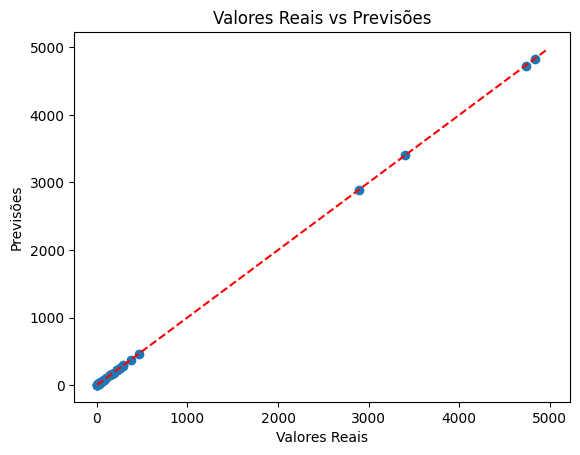

In [32]:
import matplotlib.pyplot as plt

# Criar um gráfico de dispersão
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Valores Reais vs Previsões')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Linha de identidade
plt.show()
